**Import des bibliothèques nécessaires**

In [2]:
import itertools
import warnings
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")  # Ignorer les avertissements liés aux modèles ARIMA

**DATASET**

In [3]:
df = pd.read_csv("bitcoin_data.csv")
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,2013-05-05
1,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,2013-05-06
2,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,2013-05-07
3,7,109.599998,115.779999,109.599998,113.566002,0.0,1.264049e+09,2013-05-08T23:59:59.999Z,2013-05-08
4,9,113.199997,113.459999,109.260002,112.669998,0.0,1.254535e+09,2013-05-09T23:59:59.999Z,2013-05-09


In [4]:
df["date"].dtype

dtype('O')

**ETAPE 1 : PREPARATION DES DONNEES**

**On convertit alors la colonne date en format Datetime**

In [5]:
df["date"] = pd.to_datetime(df["date"])

**On définit la date comme index du dataset**

In [6]:
df.set_index("date", inplace=True)
# Trier les données par date (au cas où elles ne sont pas triées)
df = df.sort_index()

In [7]:
df.head(3)

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp
date,,,,,,,,
2013-05-05,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z
2013-05-06,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z
2013-05-07,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z


**Suppression des anciennes numérotations**

In [8]:
df = df.drop(columns=["Unnamed: 0"])

In [9]:
df.head(3)

,open,high,low,close,volume,marketCap,timestamp
date,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z
2013-05-06,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z
2013-05-07,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z


In [10]:
df.dtypes

open         float64
high         float64
low          float64
close        float64
volume       float64
marketCap    float64
timestamp     object
dtype: object

**Vérification des valeurs manquantes**

In [11]:
print(df.isnull().sum())

open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64


**======>Absence des valeurs manquantes**

**Visualisation des données**

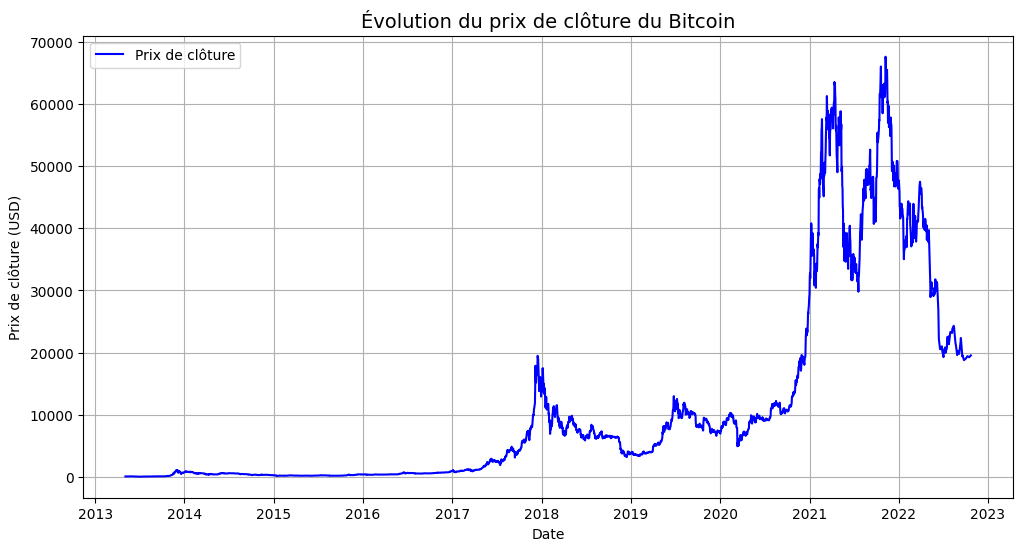

In [12]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x=df.index, y="close", label="Prix de clôture", color="blue")


plt.title("Évolution du prix de clôture du Bitcoin", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.grid(True)
plt.legend()
plt.show()

**Normalisation des données**

In [13]:
colonnes_a_normaliser = ["open", "high", "low", "close"]

# Appliquer Min-Max Scaling
scaler = MinMaxScaler()
df[colonnes_a_normaliser] = scaler.fit_transform(df[colonnes_a_normaliser])

**Visualisation des données après normalisation**

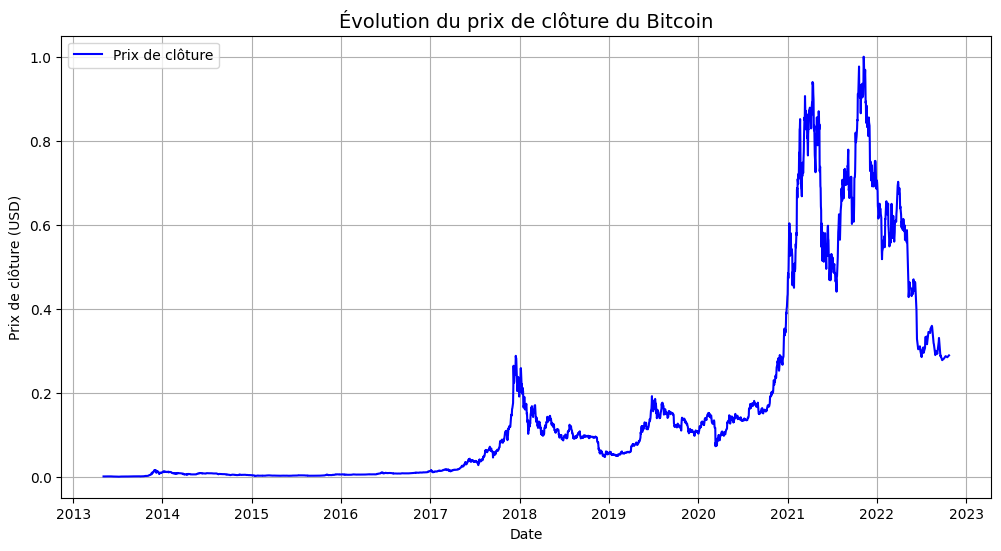

In [14]:

plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x=df.index, y="close", label="Prix de clôture", color="blue")


plt.title("Évolution du prix de clôture du Bitcoin", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.grid(True)
plt.legend()
plt.show()

In [15]:
result = adfuller(df["close"])
print("Statistique du test ADF:", result[0])
print("p-value:", result[1])

Statistique du test ADF: -1.6012511316344133
p-value: 0.4829649542292524


**Pèvalue supérieur à 0.005 donc on applique une différenciation**

In [16]:
df["close_diff"] = df["close"].diff().dropna()  # Différenciation d'ordre 1

In [17]:
df.head(7)

,open,high,low,close,volume,marketCap,timestamp,close_diff
date,,,,,,,,
2013-05-05,0.000658,0.000644,0.000628,0.000703,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,NaN
2013-05-06,0.000704,0.000729,0.000620,0.000650,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,-0.000053
2013-05-07,0.000648,0.000566,0.000485,0.000638,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,-0.000012
2013-05-08,0.000609,0.000600,0.000665,0.000669,0.0,1.264049e+09,2013-05-08T23:59:59.999Z,0.000031
2013-05-09,0.000662,0.000566,0.000659,0.000655,0.0,1.254535e+09,2013-05-09T23:59:59.999Z,-0.000013
2013-05-10,0.000656,0.000690,0.000694,0.000723,0.0,1.305479e+09,2013-05-10T23:59:59.999Z,0.000067
2013-05-11,0.000729,0.000642,0.000716,0.000694,0.0,1.284207e+09,2013-05-11T23:59:59.999Z,-0.000029


**P-value après différenciation**

In [18]:
result = adfuller(df["close_diff"].dropna())
print("Statistique du test ADF:", result[0])
print("p-value:", result[1])

Statistique du test ADF: -9.468139350282222
p-value: 4.1759624308755367e-16


**Visualisation des données après différenciation**

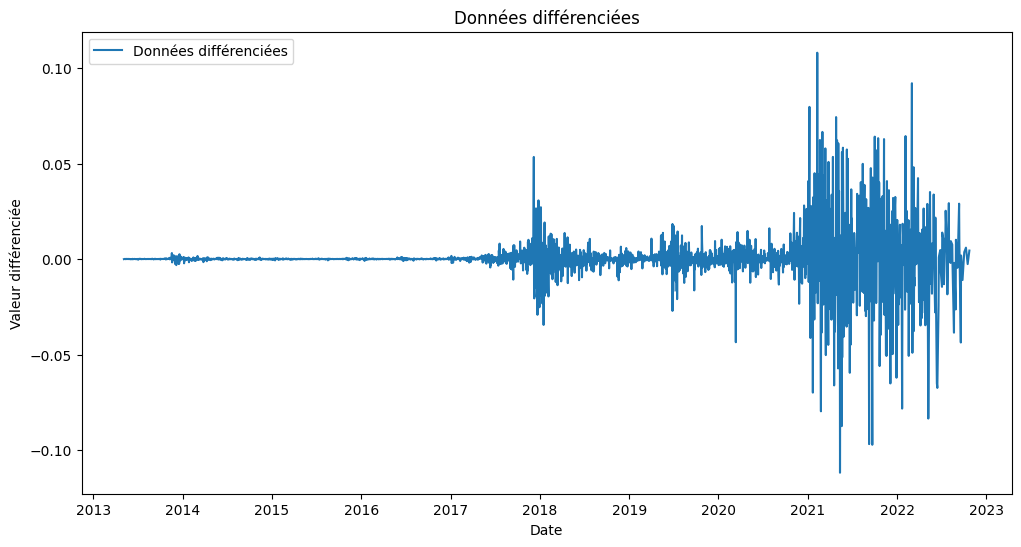

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df["close_diff"], label='Données différenciées')
plt.title('Données différenciées')
plt.xlabel('Date')
plt.ylabel('Valeur différenciée')
plt.legend()
plt.show()

**ETAPE 2 : ANALYSE EXPLORATOIRE**

**TENDANCE&SAISONALITE**

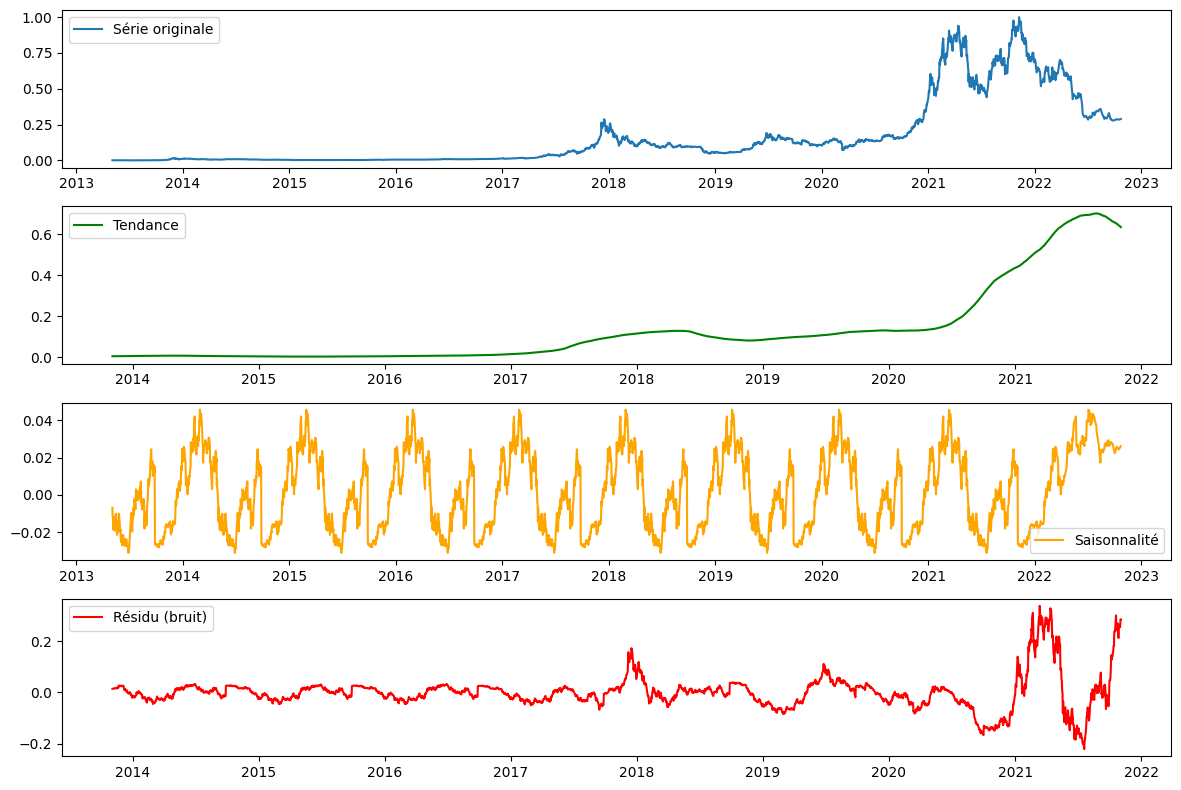

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df["close"], model="additive", period=365)  # Période de 30 jours (mensuelle)

# Tracer les résultats
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df["close"], label="Série originale")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Tendance", color="green")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Saisonnalité", color="orange")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Résidu (bruit)", color="red")
plt.legend()

plt.tight_layout()
plt.show()

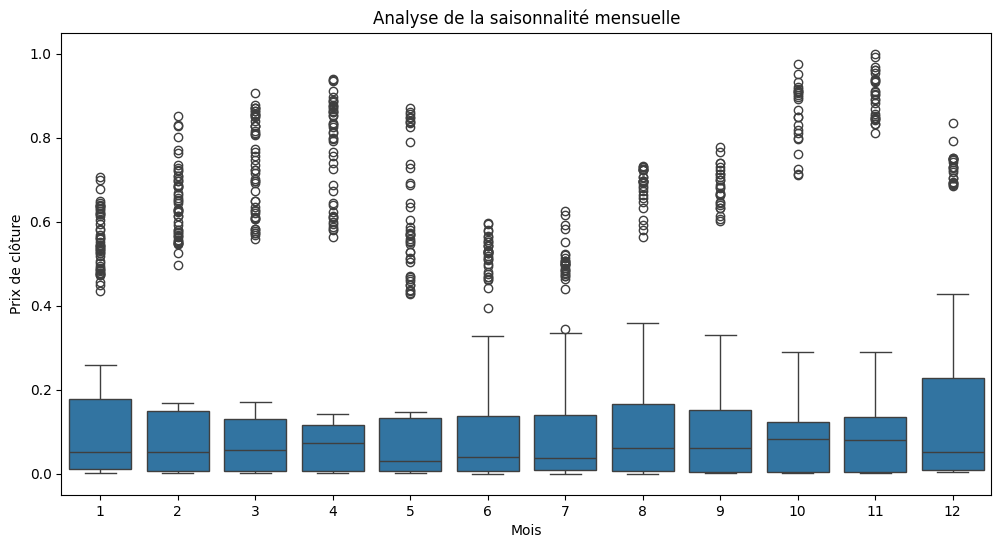

In [21]:
df["year"] = df.index.year
df["month"] = df.index.month

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["month"], y=df["close"])
plt.title("Analyse de la saisonnalité mensuelle")
plt.xlabel("Mois")
plt.ylabel("Prix de clôture")
plt.show()


# <span style="color:red; font-weight:bold;">2/ARIMA</span>

**1/Techniques traditionnelles pour les séries temporelles.**

# <span style="color:yellow; font-weight:bold;">2.1Moyenne Mobile</span>


MAE (Mean Absolute Error): 0.0096
RMSE (Root Mean Squared Error): 0.0227
MAPE (Mean Absolute Percentage Error): inf%
Persistance (corrélation retardée): 0.9987


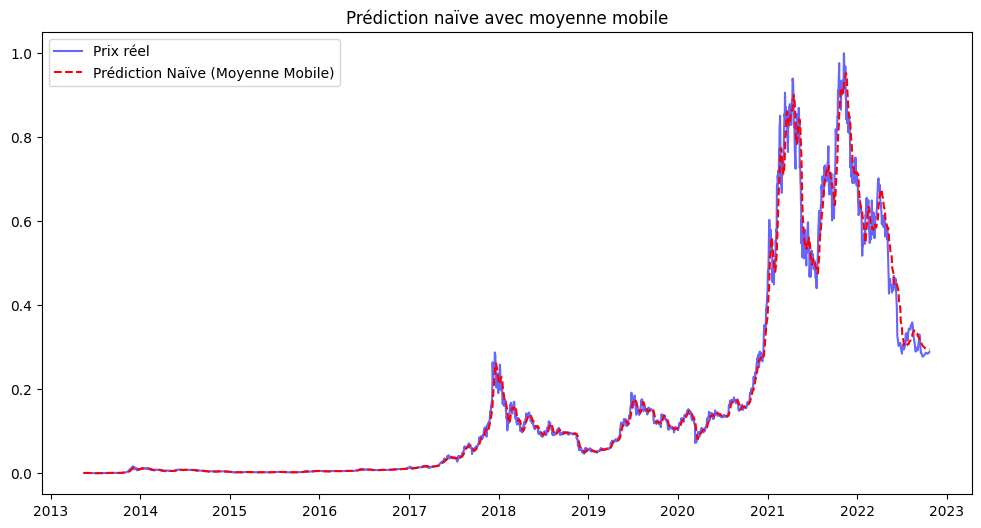

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
window_size = 10  # On utilise les 10 dernières valeurs pour la prédiction

# Prédiction naïve : moyenne mobile
df["prediction_naive"] = df["close"].rolling(window=window_size).mean().shift(1)  # Décalage pour éviter la fuite d'information

# Supprimer les valeurs NaN dues au rolling window
df.dropna(inplace=True)

# Calculer les erreurs
mae = mean_absolute_error(df["close"], df["prediction_naive"])
rmse = np.sqrt(mean_squared_error(df["close"], df["prediction_naive"]))
mape = np.mean(np.abs((df["close"] - df["prediction_naive"]) / df["close"])) * 100  # Mean Absolute Percentage Error

# Calculer la persistance (corrélation entre la valeur actuelle et la précédente)
df["close_lag"] = df["close"].shift(1)  # Décalage d'un jour
df.dropna(inplace=True)  # Supprimer les NaN créés par le décalage
persistence_corr = df["close"].corr(df["close_lag"])  # Corrélation entre le prix actuel et la veille

# Affichage des erreurs et persistance
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print(f"Persistance (corrélation retardée): {persistence_corr:.4f}")

# 📈 Visualisation
plt.figure(figsize=(12,6))
plt.plot(df.index, df["close"], label="Prix réel", color="blue", alpha=0.6)
plt.plot(df.index, df["prediction_naive"], label="Prédiction Naïve (Moyenne Mobile)", color="red", linestyle="dashed")
plt.title("Prédiction naïve avec moyenne mobile")
plt.legend()
plt.show()

In [23]:
# Diviser les données en train (80%) et test (20%) de manière chronologique
train_size = int(len(df) * 0.8)  # 80% pour l'entraînement
train, test = df[:train_size], df[train_size:]
# Initialiser une liste pour les prédictions sur l'ensemble de test
predictions_naive = []

# On commence avec l'ensemble d'entraînement, on va ajouter les vraies valeurs de test à chaque étape
train_expanded = train.copy()

for i in range(len(test)):
    # Calculer la moyenne mobile sur l'ensemble d'entraînement élargi
    train_expanded["prediction_naive"] = train_expanded["close"].rolling(window=window_size).mean().shift(1)
    
    # Prédire la valeur suivante (c'est la dernière valeur du train élargi)
    prediction = train_expanded["prediction_naive"].iloc[-1]
    predictions_naive.append(prediction)
    
    # Ajouter la valeur réelle de test correspondante à l'ensemble d'entraînement pour la prochaine itération
    train_expanded = pd.concat([train_expanded, test.iloc[i:i+1]])

# Convertir les prédictions en série temporelle
test["prediction_naive"] = predictions_naive

# Calcul des erreurs
mae_naive = mean_absolute_error(test["close"], test["prediction_naive"])
rmse_naive = np.sqrt(mean_squared_error(test["close"], test["prediction_naive"]))
mape_naive = np.mean(np.abs((test["close"] - test["prediction_naive"]) / test["close"])) * 100

# Affichage des erreurs pour la prédiction naïve
print(f"Prédiction naïve (moyenne mobile):")
print(f"MAE : {mae_naive:.4f}, RMSE : {rmse_naive:.4f}, MAPE : {mape_naive:.2f}%")


Prédiction naïve (moyenne mobile):
MAE : 0.0388, RMSE : 0.0546, MAPE : 7.32%


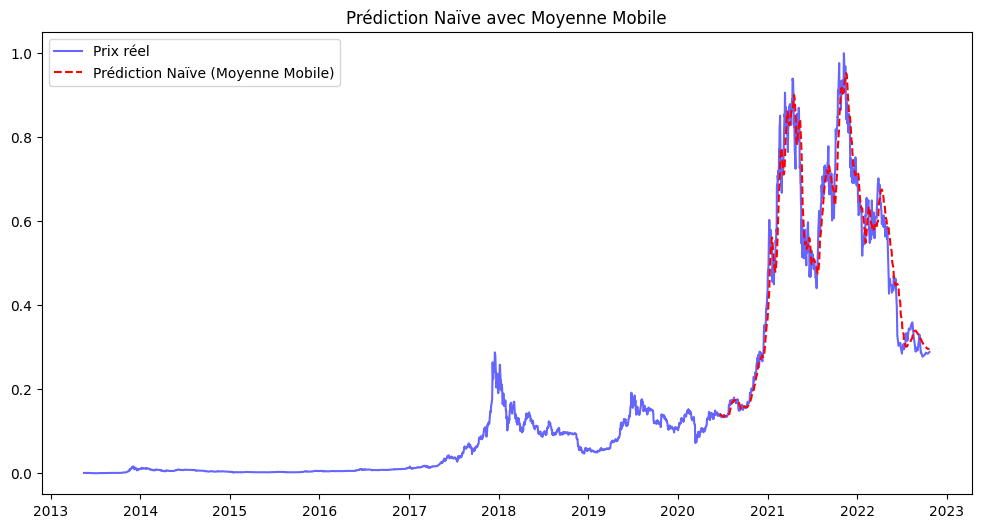

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["close"], label="Prix réel", color="blue", alpha=0.6)
plt.plot(test.index, test["prediction_naive"], label="Prédiction Naïve (Moyenne Mobile)", color="red", linestyle="dashed")
plt.title("Prédiction Naïve avec Moyenne Mobile")
plt.legend()
plt.show()

# <span style="color:green;">Division du dataset (80% pour l'entrainement)</span>

In [25]:
train_size = int(len(df) * 0.8)
X=df["close"]
train, test = X.iloc[:train_size], X.iloc[train_size:]

<Figure size 1000x600 with 0 Axes>

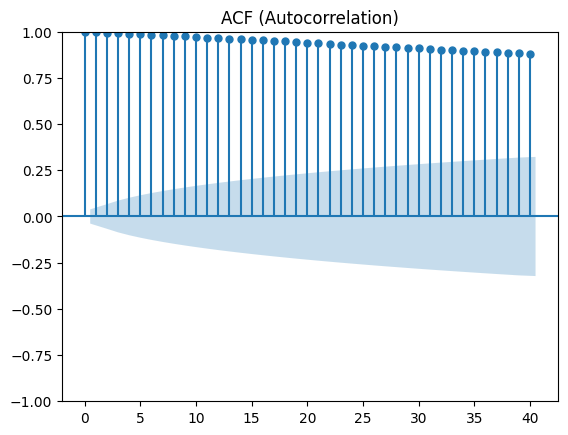

<Figure size 1000x600 with 0 Axes>

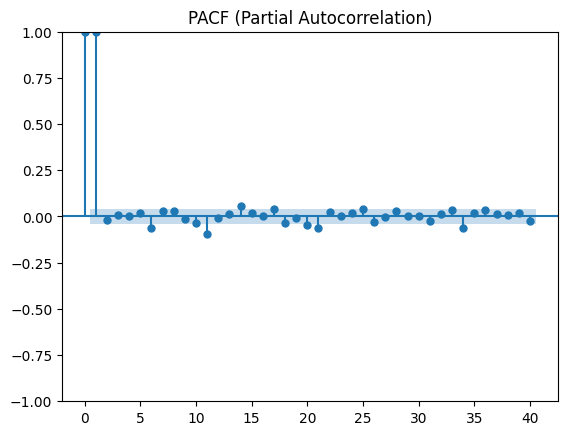

In [26]:
plt.figure(figsize=(10, 6))
plot_acf(train, lags=40, title="ACF (Autocorrelation)")
plt.show()

plt .figure(figsize=(10, 6))
plot_pacf(train, lags=40, title="PACF (Partial Autocorrelation)")
plt.show()

**RECHERCHE des paramètres en utilisant GRID SEARCH**

In [27]:
def grid_search_arima(train, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(train, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_score:
                best_score, best_cfg = aic, (p, d, q)
        except:
            continue
    return best_cfg, best_score

In [28]:
p_values = range(1,5)
d_values = [1]
q_values = range(1, 5)

best_cfg, best_score = grid_search_arima(train, p_values, d_values, q_values)
print(f"Meilleurs paramètres ARIMA: {best_cfg} avec AIC: {best_score}")

Meilleurs paramètres ARIMA: (2, 1, 4) avec AIC: -21452.608437636387


**Entrainement du modèle avec les paramètres trouvés**

# <span style="color:yellow; font-weight:bold;">2.2 ARIMA</span>

In [29]:
best_model = ARIMA(df["close"], order=best_cfg)
best_model_fit = best_model.fit()

In [30]:
history = list(train)
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=best_cfg)  # Utilisation des paramètres optimisés
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[t])  # Mise à jour avec la vraie valeur

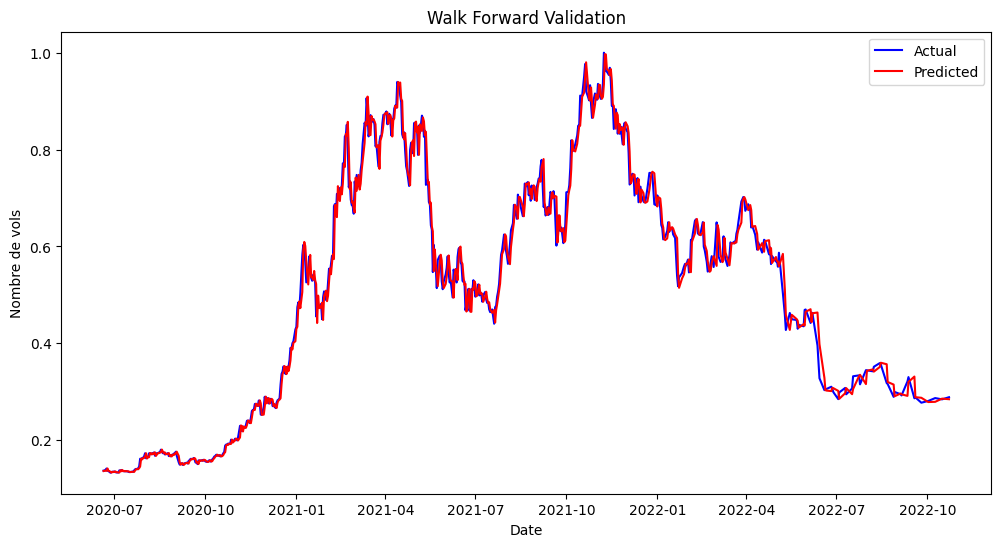

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label="Actual", color="blue")
plt.plot(test.index, predictions, label="Predicted", color="red")
plt.title("Walk Forward Validation")
plt.xlabel("Date")
plt.ylabel("Nombre de vols")
plt.legend()
plt.show()

In [32]:
# Calcul des métriques
residuals = test.values - np.array(predictions)
residual_forecast_error = np.mean(residuals)
forecast_bias = residual_forecast_error
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"Residual Forecast Error: {residual_forecast_error}")
print(f"Forecast Bias: {forecast_bias}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Residual Forecast Error: 0.00015726277847781094
Forecast Bias: 0.00015726277847781094
Mean Absolute Error: 0.016502714189829973
Mean Squared Error: 0.0006133726996109333
Root Mean Squared Error: 0.024766362260350897


# <span style="color:yellow; font-weight:bold;">2.3 Modèle de Persistence</span>

In [33]:
# Modèle de persistance (Baseline)
persistence_predictions = test.shift(1).dropna()
test_persistence = test[1:]
mse_baseline = mean_squared_error(test_persistence, persistence_predictions)
print(f"Mean Squared Error: {mse_baseline}")
rmse_baseline = np.sqrt(mse_baseline)
print(f"Root Mean Squared Error: {rmse_baseline}")

Mean Squared Error: 0.0006005342230064369
Root Mean Squared Error: 0.024505799783039867


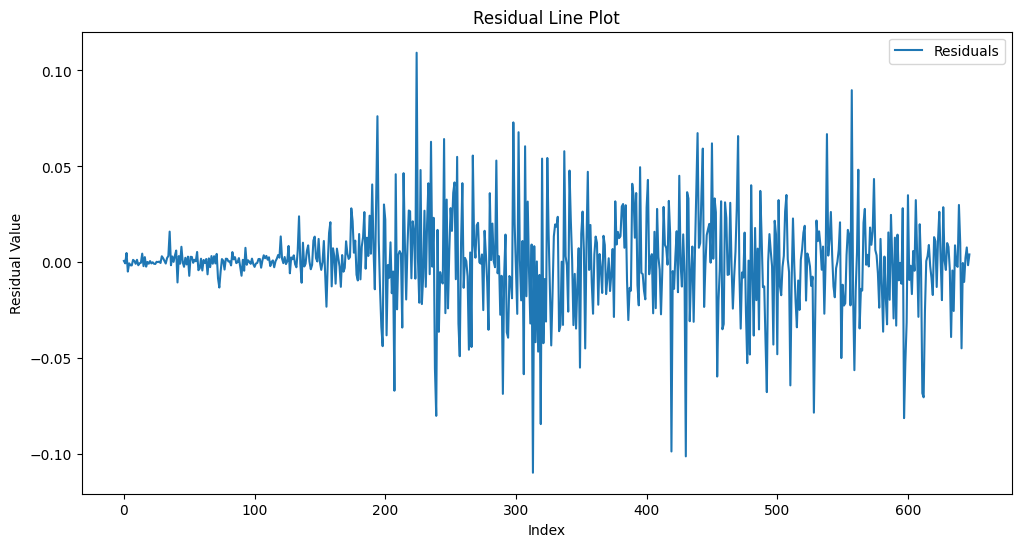

In [34]:
# Visualisation des résidus
plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Residuals")
plt.title("Residual Line Plot")
plt.xlabel("Index")
plt.ylabel("Residual Value")
plt.legend()
plt.show()

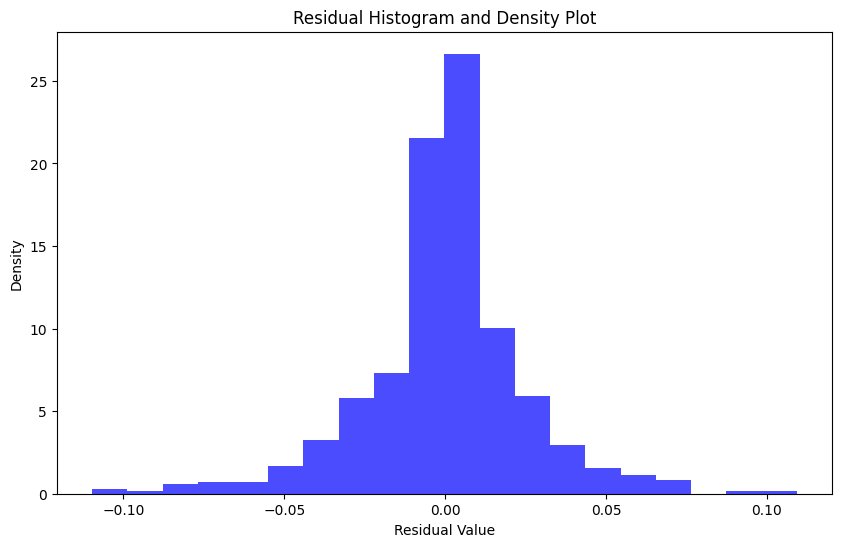

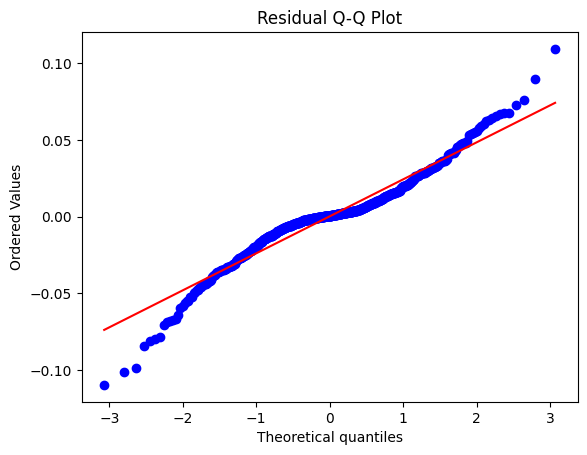

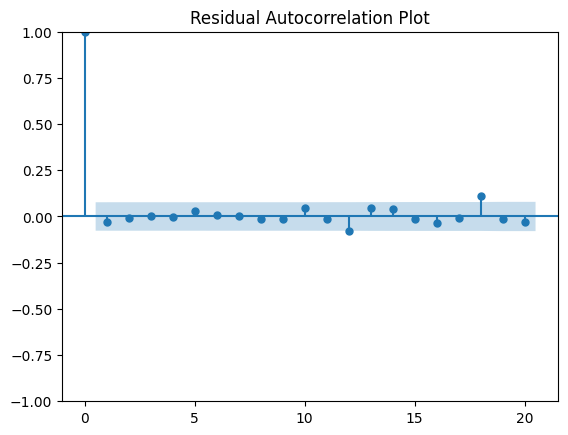

In [35]:
# Histogramme et densité des résidus
from scipy import stats


plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.7, color="blue", density=True)
plt.title("Residual Histogram and Density Plot")
plt.xlabel("Residual Value")
plt.ylabel("Density")
plt.show()

# Q-Q Plot des résidus
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Residual Q-Q Plot")
plt.show()

# Autocorrélation des résidus
plot_acf(residuals, lags=20)
plt.title("Residual Autocorrelation Plot")
plt.show()